<h1><center>LAB 7</center></h1>
Mini Project. [Spotify Exploratory Data Analysis]

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving spotify_data.csv to spotify_data.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("spotify_data.csv")

<h2><center>Cleaning</center></h2

In [ ]:
print("Current column names:")
print(df.columns)

df.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)

print("Missing values before handling:")
print(df.isnull().sum())

df.dropna(inplace=True)

print("\nDuplicate rows before removing:")
print(df.duplicated().sum())

df.drop_duplicates(inplace=True)

print("\nCleaned DataFrame:")
print(df.head())

Current column names:
Index(['Unnamed: 0', 'artist_name', 'track_name', 'release_date', 'genre',
       'len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability',
       'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy',
       'topic', 'age'],
      dtype='object')
Missing values before handling:
ID                          0
artist_name                 0
track_name                  0
release_date                0
genre                       0
len                         0
dating                      0
violence                    0
world/life                  0
night/time                  0
shake the audience          0
family/gospel               0
romantic                    0
communication               0
obscene                     0
music 

<h2><center>Summary Statistics</center></h2

In [ ]:
columns_of_interest = ['genre', 'len', 'dating', 'violence', 'world/life', 'night/time',
                       'shake the audience', 'family/gospel', 'romantic', 'communication',
                       'obscene', 'music', 'movement/places', 'light/visual perceptions',
                       'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability',
                       'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy', 'topic']

selected_summary = df[columns_of_interest].describe()

categorical_summary = df['genre'].value_counts()

print("Summary statistics : ")
print(selected_summary)

print("\nSummary statistics for categorical columns (genre) : ")
print(categorical_summary)

## Main Analysis Points

# Average Song Length: 1 min 13 sec

## Major factor contributing songs
# Average Danceability: 0.53
# Average Loudness: 0.67
# Average Acousticness: 0.34
# Average Valence: 0.53
# Average Energy: 0.57

Summary statistics : 
                len        dating      violence    world/life    night/time  \
count  28372.000000  28372.000000  28372.000000  28372.000000  28372.000000   
mean      73.028444      0.021112      0.118396      0.120973      0.057387   
std       41.829831      0.052370      0.178684      0.172200      0.111923   
min        1.000000      0.000291      0.000284      0.000291      0.000289   
25%       42.000000      0.000923      0.001120      0.001170      0.001032   
50%       63.000000      0.001462      0.002506      0.006579      0.001949   
75%       93.000000      0.004049      0.192608      0.197793      0.065842   
max      199.000000      0.647706      0.981781      0.962105      0.973684   

       shake the audience  family/gospel      romantic  communication  \
count        28372.000000   28372.000000  28372.000000   28372.000000   
mean             0.017422       0.017045      0.048681       0.076680   
std              0.040670       0.041966      0

<h2><center>Genre Trends</center></h2

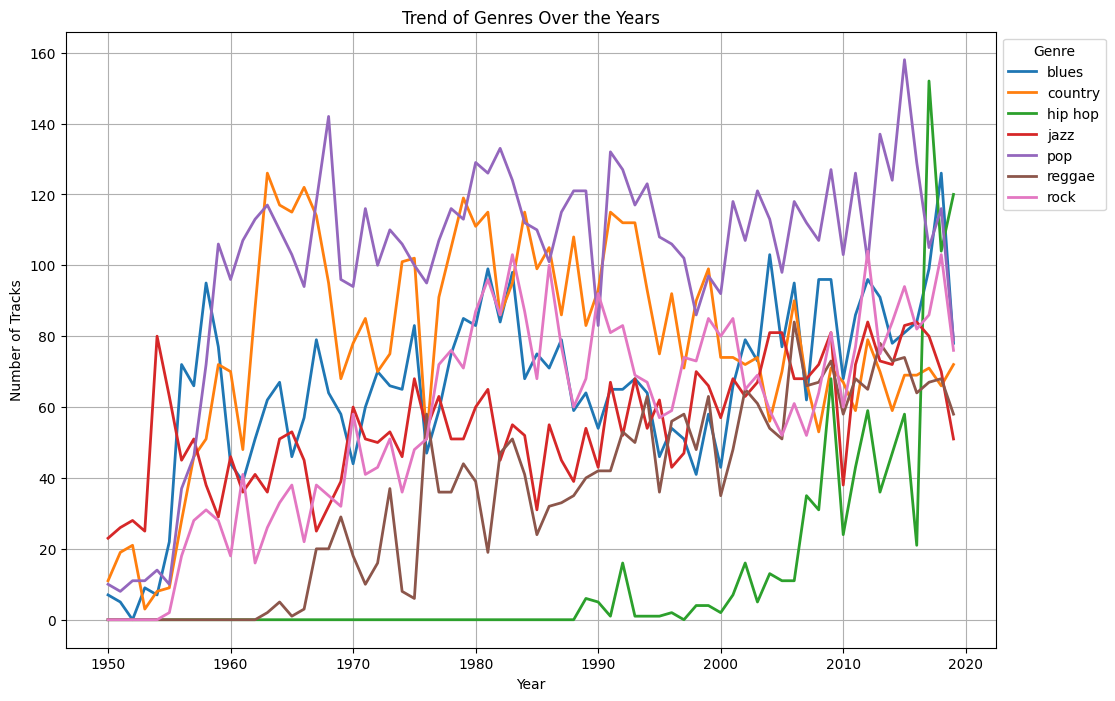

<Figure size 1200x800 with 0 Axes>

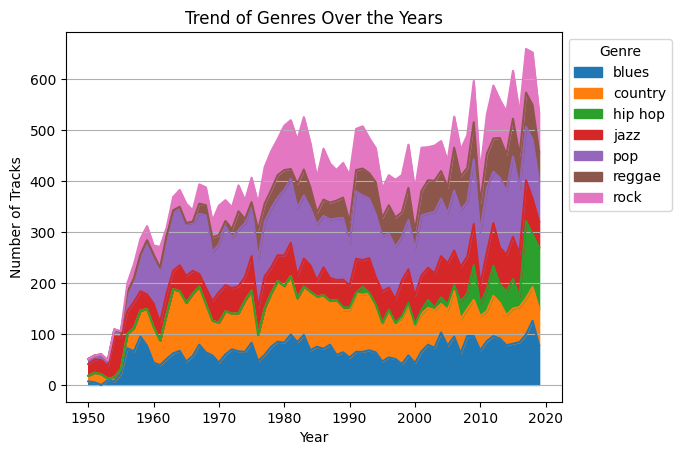

In [ ]:
genre_year_count = df.groupby(['release_date', 'genre']).size().unstack(fill_value=0)

genre_year_count.plot(kind='line', figsize=(12, 8), linewidth=2)
plt.title('Trend of Genres Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.legend(title='Genre', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 8))
genre_year_count.plot(kind='area', stacked=True)
plt.title('Trend of Genres Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.legend(title='Genre', bbox_to_anchor=(1, 1))
plt.grid(axis='y')
plt.show()


## Main Analysis Points

# Hip Hop Culture grown exponentially, peaked at 2005
# jazz and raggae
# rock,pop & country

<h2><center>Corelation  Analysis</center></h2>

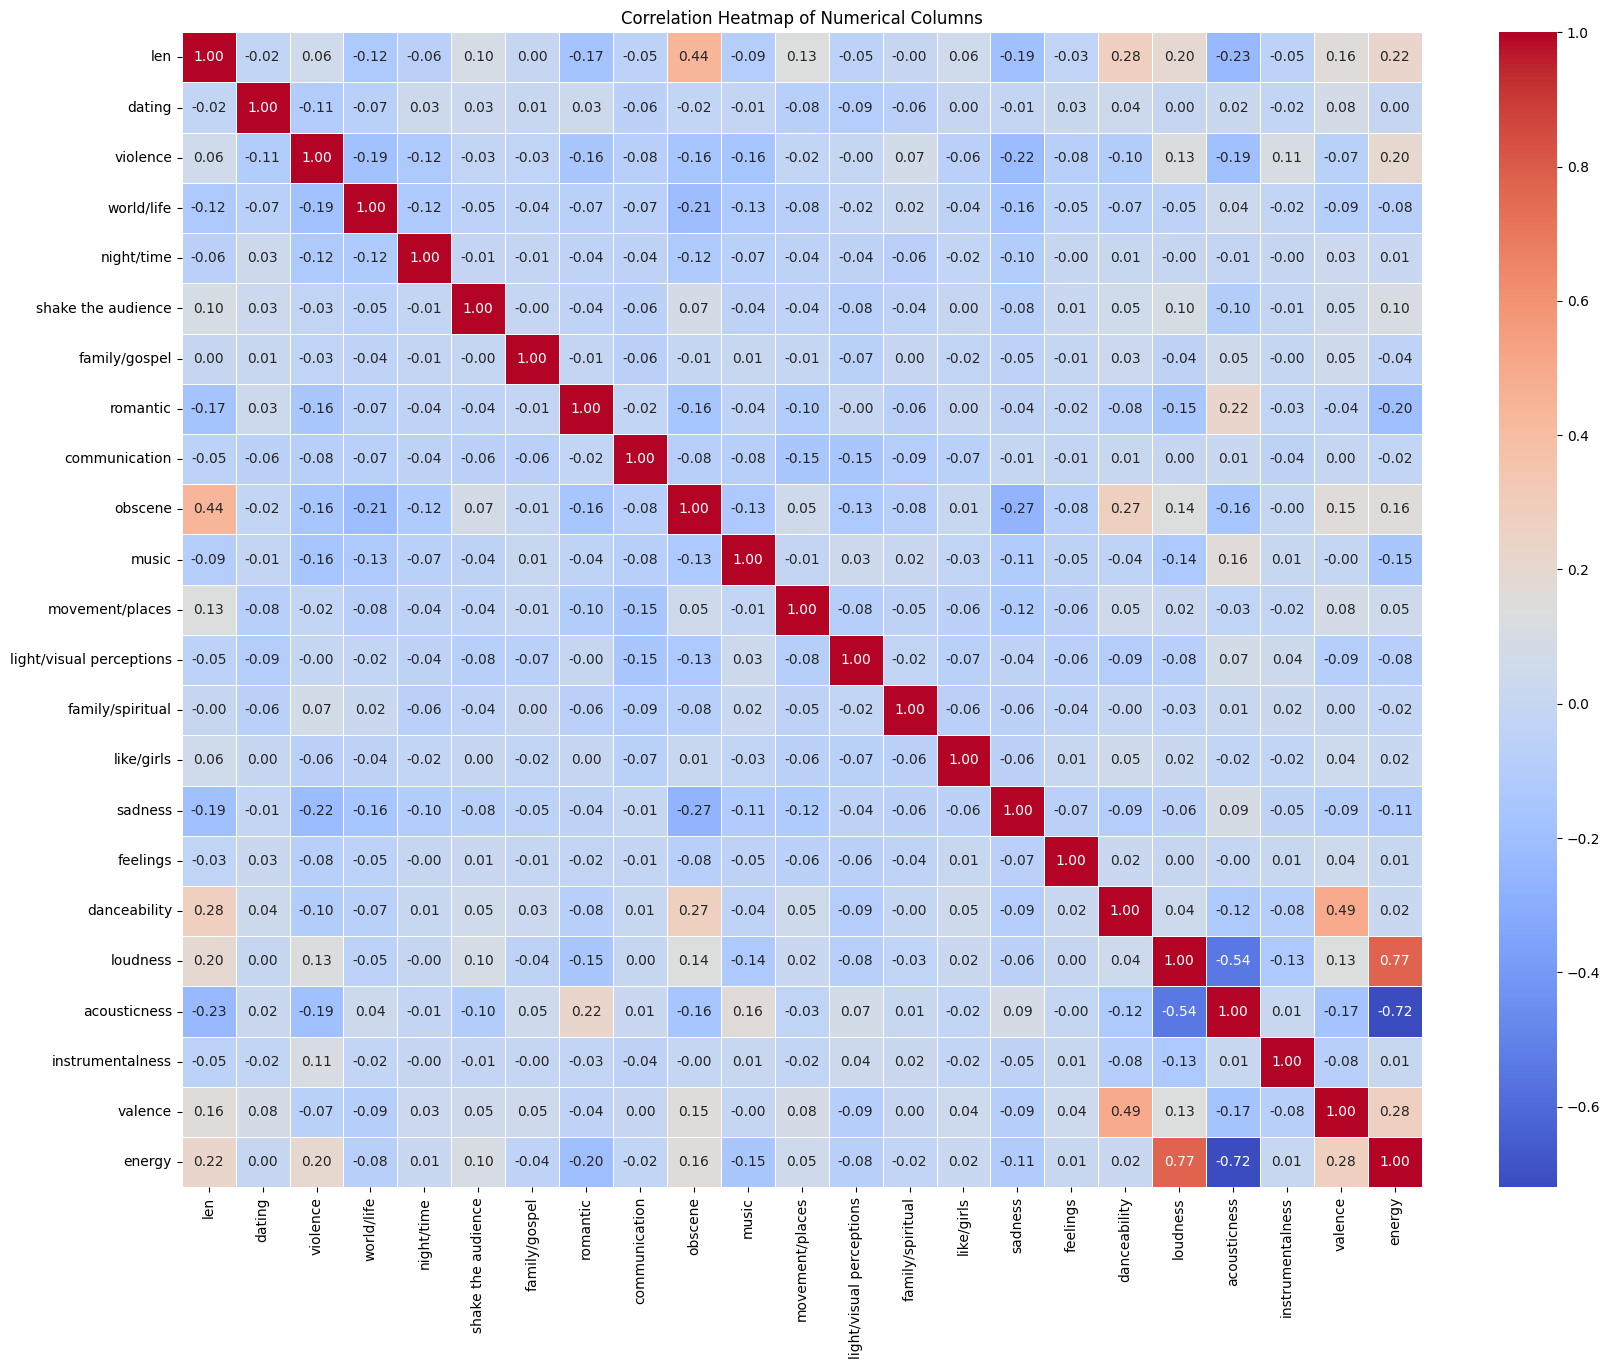

In [ ]:
import seaborn as sns

numerical_cols = ['len', 'dating', 'violence', 'world/life', 'night/time', 'shake the audience',
                  'family/gospel', 'romantic', 'communication', 'obscene', 'music', 'movement/places',
                  'light/visual perceptions', 'family/spiritual', 'like/girls', 'sadness', 'feelings',
                  'danceability', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy']

correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

## Main Analysis

#  Obscene vs len (Positive Relation)
#  Valence vs Dancibility (Positive Relation)
#  Energy vs  Loundness  (Positive Relation)
#  Energy vs Acousticness (Inverse Relation)
# Acoustic vs Loudness (Inverse Relation)

<h2><center>Gradient Boosting Classifier</center></h2>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

X = df[['len', 'dating', 'violence', 'world/life', 'night/time',
        'shake the audience', 'family/gospel', 'romantic', 'communication',
        'obscene', 'music', 'movement/places', 'light/visual perceptions',
        'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability',
        'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy']]
y = df['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.4230837004405286

Classification Report:
              precision    recall  f1-score   support

       blues       0.38      0.28      0.32       926
     country       0.45      0.58      0.51      1123
     hip hop       0.53      0.43      0.48       198
        jazz       0.46      0.41      0.43       731
         pop       0.37      0.43      0.40      1398
      reggae       0.49      0.48      0.49       515
        rock       0.41      0.32      0.36       784

    accuracy                           0.42      5675
   macro avg       0.44      0.42      0.43      5675
weighted avg       0.42      0.42      0.42      5675



In [ ]:
##Conclusion


#1) Average Song Length: 1 min 13 sec, while Average Danceability,Loudness, Acousticness, Valance & Energy are major parameter.
#2) Hip Hop Culture grown exponentially, peaked at 2005,
#3) jazz and raggae popularity going down.
#4) rock,pop & country having  constant popularity.

#5) Co-relation :
  #  Obscene vs len (Positive Relation)
  #  Valence vs Dancibility (Positive Relation)
  #  Energy vs  Loundness  (Positive Relation)
  #  Energy vs Acousticness (Negative Relation)
  # Acoustic vs Loudness (Negative Relation)

#6) Gradient Boosting Classification (accuracy :  .42%)
